In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from terminal_optimization import agribulk_objects
from terminal_optimization import agribulk_defaults
from terminal_optimization import agribulk_system

# 0. Prepare inputs

In [3]:
startyear = 2018
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [4]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2023:
        demand.append(750_000)
    else:
        demand.append(1_600_000)

scenario_data={'year': years, 'volume': demand}

# instantiate a commodity objects
# maize
agribulk_defaults.maize_data['handysize_perc'] = 0
agribulk_defaults.maize_data['handymax_perc'] = 100
agribulk_defaults.maize_data['panamax_perc'] = 0
agribulk_defaults.maize_data['handling_fee'] = 9.8 # example Wijnand
agribulk_defaults.maize_data['historic_data'] = []
maize = agribulk_objects.Commodity(**agribulk_defaults.maize_data)
maize.scenario_data = pd.DataFrame(data=scenario_data)

# wheat
agribulk_defaults.wheat_data['historic_data'] = []
agribulk_defaults.wheat_data['scenario_data'] = []
wheat = agribulk_objects.Commodity(**agribulk_defaults.wheat_data)

# soybeans
agribulk_defaults.soybean_data['historic_data'] = []
agribulk_defaults.soybean_data['scenario_data'] = []
soybeans = agribulk_objects.Commodity(**agribulk_defaults.soybean_data)

# combine
demand = [maize, wheat, soybeans]

# plot scenarios 
if False:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

## 0.2 Generate vessels

In [5]:
# instantiate vessels
handysize = agribulk_objects.Vessel(**agribulk_defaults.handysize_data)
agribulk_defaults.handymax_data['call_size'] = 50000
handymax = agribulk_objects.Vessel(**agribulk_defaults.handymax_data)
panamax = agribulk_objects.Vessel(**agribulk_defaults.panamax_data)


vessels = [handysize, handymax, panamax] 

# 1. Instatiate terminal system

In [6]:
Terminal = agribulk_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 5840,   # example Wijnand
                         debug=True,
                         crane_type_defaults=agribulk_defaults.mobile_crane_data, 
                         storage_type_defaults=agribulk_defaults.silo_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [7]:
Terminal.simulate()


Simulate year: 2018
  Total vessel calls: 15
     Handysize calls: 0
     Handymax calls: 15
     Panamax calls: 0
  Total cargo volume: 750000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after adding berth): inf
  *** add Quay to elements
     Berth occupancy planned (after adding quay): inf
     Berth occupancy online (after adding quay): inf
  *** add Harbour crane to elements
     Berth occupancy planned (after adding

      a total of 65000 ton of storage capacity is online; 80000 ton total planned
  *** add storage to elements
      a total of 65000 ton of storage capacity is online; 85000 ton total planned
  *** add storage to elements
      a total of 65000 ton of storage capacity is online; 90000 ton total planned
     Station occupancy planned (@ start of year): 0.4954296613738265
     Station occupancy online (@ start of year): 0.4954296613738265
  *** add station to elements
    station_occupancy_planned: 0.24771483068691325

Simulate year: 2024
  Total vessel calls: 32
     Handysize calls: 0
     Handymax calls: 32
     Panamax calls: 0
  Total cargo volume: 1600000
     a total of 2 Berth_01 is online; 2 total planned
     a total of 1 Quay_01 is online; 2 total planned
     a total of 3 Mobile_crane_01 is online; 4 total planned
     a total of 0 [] is online; 0 total planned
     a total of 3 Quay_conveyor_01 is online; 3 total planned
     a total of 18 Silo_01 is online; 18 total plann

## Report all elements

In [8]:
# if False: 
for element in Terminal.elements:
    print("")
    print(element.name)
    print("")
    print(element.__dict__)


Maize

{'historic_data': [], 'scenario_data':    year   volume
0  2018   750000
1  2019   750000
2  2020   750000
3  2021   750000
4  2022   750000
5  2023  1600000
6  2024  1600000
7  2025  1600000
8  2026  1600000
9  2027  1600000, 'handling_fee': 9.8, 'handysize_perc': 0, 'handymax_perc': 100, 'panamax_perc': 0, 'name': 'Maize', 'id': '211fba3a-54be-11e9-bbf4-60f677ba2ce0'}

Wheat

{'historic_data': [], 'scenario_data': [], 'handling_fee': 9.8, 'handysize_perc': 0, 'handymax_perc': 0, 'panamax_perc': 100, 'name': 'Wheat', 'id': '2120087e-54be-11e9-b6a8-60f677ba2ce0'}

Soybeans

{'historic_data': [], 'scenario_data': [], 'handling_fee': 9.8, 'handysize_perc': 50, 'handymax_perc': 50, 'panamax_perc': 0, 'name': 'Soybeans', 'id': '2120087f-54be-11e9-aa86-60f677ba2ce0'}

Handysize_1

{'type': 'Handysize', 'call_size': 35000, 'LOA': 130, 'draft': 10, 'beam': 24, 'max_cranes': 2, 'all_turn_time': 24, 'mooring_time': 3, 'demurrage_rate': 600, 'name': 'Handysize_1', 'id': '21f4f052-54be-11

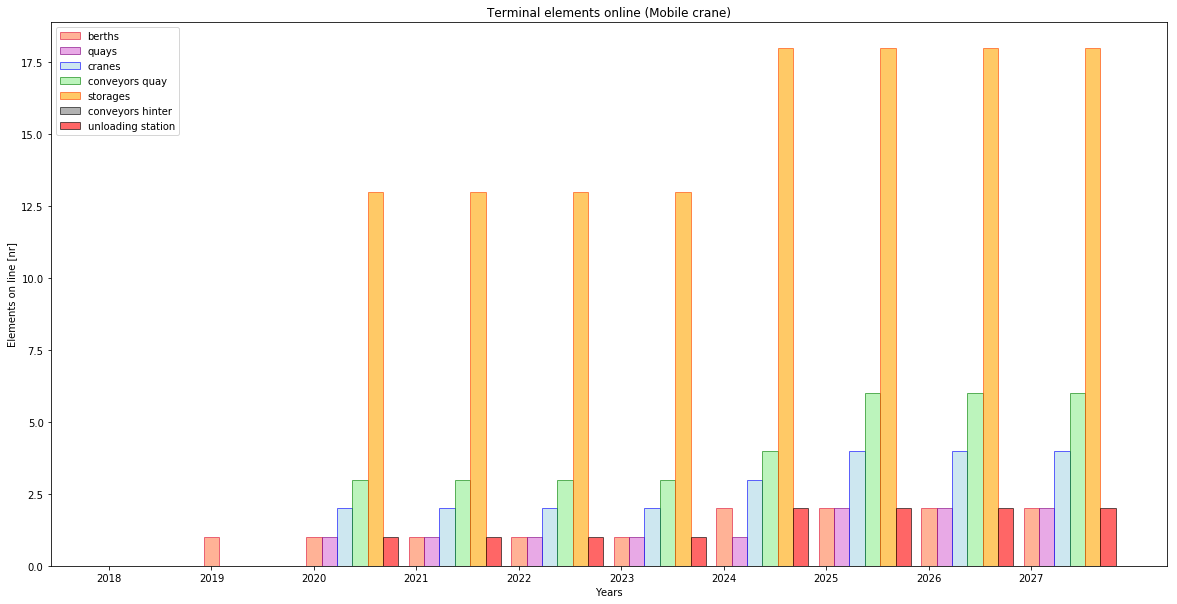

In [9]:
Terminal.terminal_elements_plot()

In [10]:
# Terminal.terminal_elements_wijnvb_plot()

In [11]:
self=Terminal

In [12]:
"""Gather data from Terminal and plot which elements come online when"""



width = 0.15
alpha = 0.5
# collect elements to add to plot
years = []
berths = []
cranes = []

for year in range(self.startyear, self.startyear + self.lifecycle):
    years.append(year)
    berths.append(0)
    cranes.append(0)

    for element in self.elements:
        if isinstance(element, objects.Berth):
            if year >= element.year_online:
                berths[-1] += 1
        if isinstance(element, objects.Cyclic_Unloader) | isinstance(element, objects.Continuous_Unloader):
            if year >= element.year_online:
                cranes[-1] += 1

# get demand
demand = pd.DataFrame()
demand['year'] = list(range(self.startyear, self.startyear + self.lifecycle))
demand['demand'] = 0
for commodity in self.find_elements(objects.Commodity):
    try:
        for column in commodity.scenario_data.columns:
            if column in commodity.scenario_data.columns and column != "year":
                demand['demand'] += commodity.scenario_data[column]
    except:
        pass

# generate plot
fig, ax = plt.subplots(figsize=(5, 5))

ax.bar([x - 0.5 * width for x in years], berths, width=width, alpha=alpha, label="berths", color='steelblue')
ax.bar([x + 0.5 * width for x in years], cranes, width=width, alpha=alpha, label="cranes", color='lightgray')
ax.step(years, demand['demand'].values, label="demand")

ax.set_xlabel('Years')
ax.set_ylabel('Elements on line [nr]')
ax.set_title('Terminal elements online ({})'.format(self.crane_type_defaults['crane_type']))
ax.set_xticks([x for x in years])
ax.set_xticklabels(years)
ax.legend()


NameError: name 'objects' is not defined

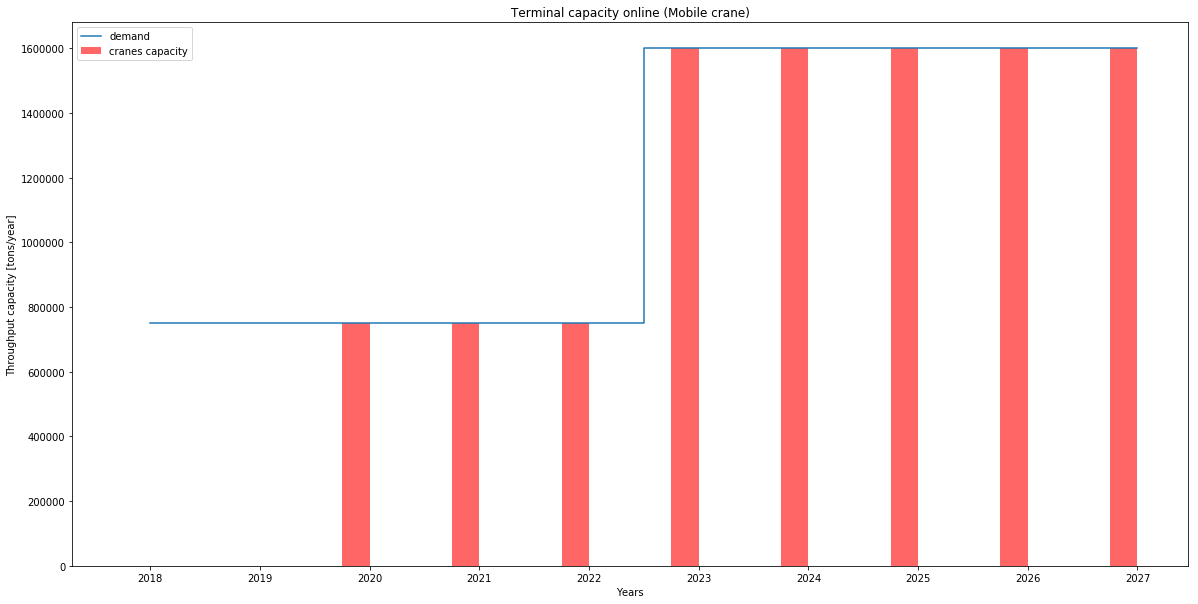

In [13]:
Terminal.terminal_capacity_plot()

In [14]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

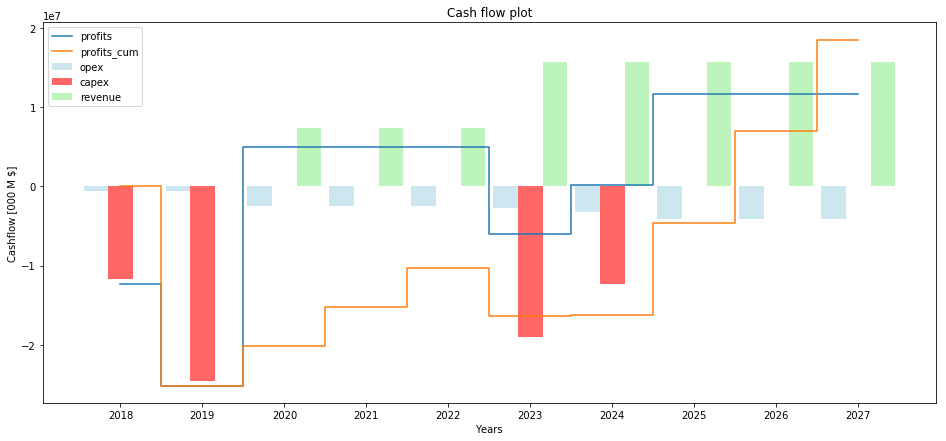

In [15]:
Terminal.cashflow_plot(cash_flows)

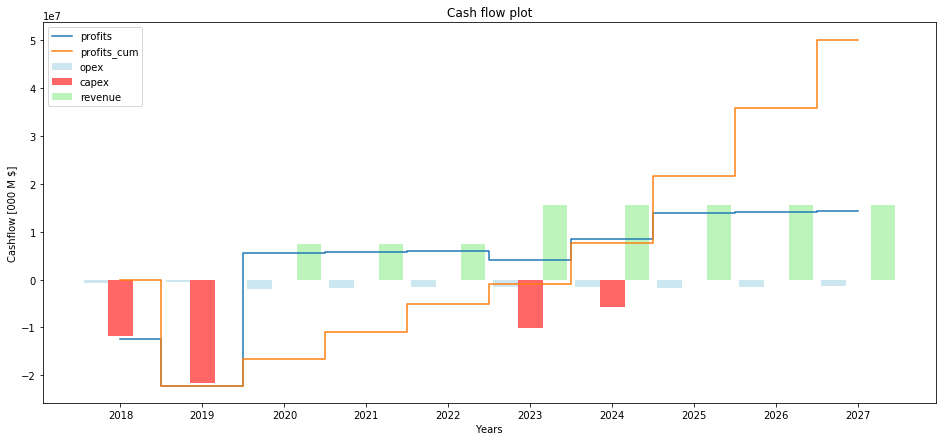

In [16]:
Terminal.cashflow_plot(cash_flows_WACC_real)

## SandBox

In [17]:
Terminal.NPV()

PV: [-12361300.         -25121200.           4921613.98502493
   4921613.98502493   4921613.98502493  -6039141.45245962
    150577.88836986  11579044.22446346  11579044.22446346
  11579044.22446346]
NPV: 6130911.064375404
